<a href="https://colab.research.google.com/github/IVMRanepa/IT_in_the_system_of_measures_to_prevent_corruption_and_other_offenses_in_the_state_civil-service/blob/main/Python_code_examples_for_solving_corruption_and_crime_prevention_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Примеры Python-кодов для решения задач профилактики коррупции и правонарушений**

# **Python code examples for solving corruption and crime prevention problems**

1. Валидация и безопасная обработка пользовательского ввода
Проблема: Недостаточная валидация данных может привести к уязвимостям (например, инъекции кода, обход доступа)

In [ ]:
import re

# Получение имени файла от пользователя
user_input = input("Введите имя файла: ")

# Проверка имени файла с помощью регулярного выражения
if re.match(r"^[a-zA-Z0-9_\-/]+\.txt$", user_input):
    with open(user_input, 'r') as file:
        content = file.read()
    print(content)
else:
    print("Недопустимое имя файла.")

Введите имя файла: 1fuyt
Недопустимое имя файла.


Комментарий: Такой подход защищает от попыток доступа к системным файлам и атак типа directory traversal.

In [ ]:
import re  # Импортируем модуль re для работы с регулярными выражениями

# Получаем имя файла от пользователя
user_input = input("Введите имя файла: ")

# Проверяем имя файла с помощью регулярного выражения
if re.match(r"^[a-zA-Z0-9_\-/]+\.txt$", user_input):
    # Если имя соответствует формату, открываем файл в режиме чтения
    try:
        with open(user_input, 'r') as file:  # Открываем файл
            content = file.read()  # Читаем содержимое файла
            print(content)  # Выводим содержимое файла на экран
    except FileNotFoundError:  # Обработка случая, если файл не найден
        print("Ошибка: Файл не найден.")
    except Exception as e:  # Обработка других возможных ошибок
        print(f"Ошибка: {e}")
else:
    # Если имя файла не соответствует формату, выводим сообщение об ошибке
    print("Недопустимое имя файла. Убедитесь, что имя заканчивается на .txt и содержит только разрешённые символы.")

Введите имя файла: 123.txt
Ошибка: Файл не найден.


In [ ]:
from ast import literal_eval

user_input = input("Введите простое выражение (например, 2 + 3): ")
try:
    result = literal_eval(user_input)
    print(f"Результат: {result}")
except ValueError:
    print("Недопустимое выражение.")

Введите простое выражение (например, 2 + 3): 2 + 3
Недопустимое выражение.


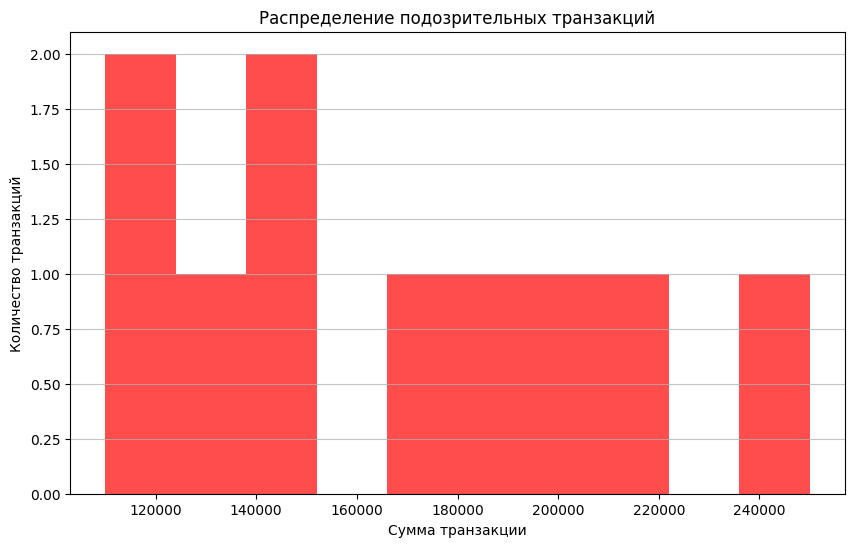

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Создадим примерные данные транзакций
data = {
    'transaction_id': range(1, 21),
    'amount': [5000, 150000, 30000, 250000, 80000, 120000, 45000, 200000, 70000, 110000,
               9000, 130000, 60000, 170000, 40000, 210000, 10000, 140000, 50000, 190000]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Фильтруем подозрительные транзакции (сумма > 100000)
suspicious = df[df['amount'] > 100000]

# Визуализация подозрительных транзакций
plt.figure(figsize=(10, 6))
plt.hist(suspicious['amount'], bins=10, color='red', alpha=0.7)
plt.title('Распределение подозрительных транзакций')
plt.xlabel('Сумма транзакции')
plt.ylabel('Количество транзакций')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Объяснение**

* Мы создали DataFrame с 20 транзакциями и разными суммами.

* Отфильтровали транзакции с суммой больше 100000 — считаем их подозрительными.

* Построили гистограмму для визуализации распределения подозрительных транзакций.

3. Пример кода из открытых проектов для выявления подозрительных транзакций (GitHub/Kaggle)

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Загрузка примерного датасета с транзакциями
df = pd.read_csv('transactions.csv')  # замените на свой файл или датасет Kaggle

# Выбор признаков для анализа
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df[features]

# Обучение модели для выявления аномалий
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(X)

# Фильтрация подозрительных транзакций
suspicious = df[df['anomaly'] == -1]

# Визуализация подозрительных транзакций по сумме
plt.figure(figsize=(10,6))
plt.hist(suspicious['amount'], bins=30, color='red', alpha=0.7)
plt.title('Распределение подозрительных транзакций по сумме')
plt.xlabel('Сумма транзакции')
plt.ylabel('Количество')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'transactions.csv'

**Построение графа транзакций для выявления коррупционных связей**

**Проблема:** Необходимость визуализации и анализа связей между участниками
транзакций.

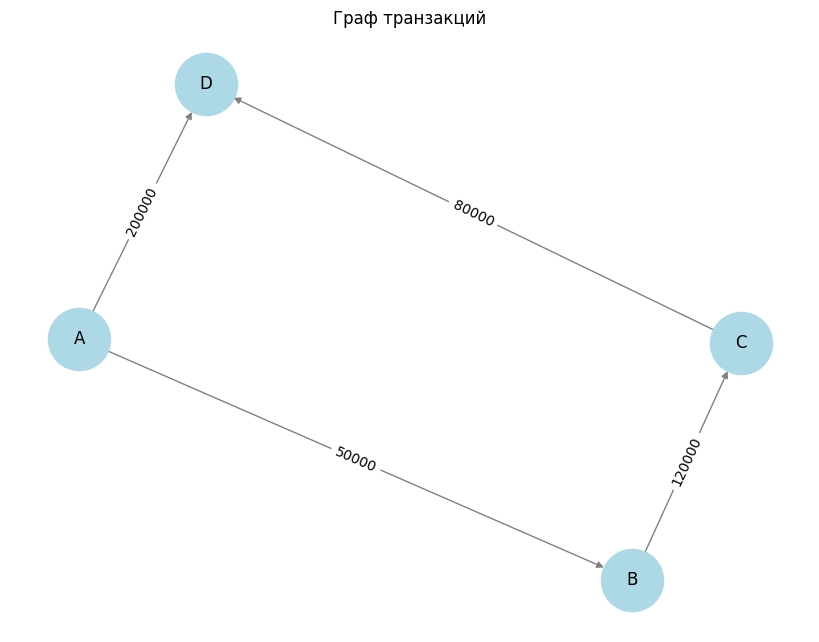

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Пример данных: отправитель, получатель, сумма
data = [
    {'sender': 'A', 'receiver': 'B', 'amount': 50000},
    {'sender': 'B', 'receiver': 'C', 'amount': 120000},
    {'sender': 'C', 'receiver': 'D', 'amount': 80000},
    {'sender': 'A', 'receiver': 'D', 'amount': 200000},
]

df = pd.DataFrame(data)
G = nx.from_pandas_edgelist(df, 'sender', 'receiver', ['amount'], create_using=nx.DiGraph())

# Визуализация графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'amount')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Граф транзакций')
plt.show()